In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
# !pip install category_encoders

In [ ]:
# import category_encoders as ce

# IMPORTANT NOTE: Not proceeding with ML training for predicting Bid - Not_bid

The recommendations for balancing the data were:
1. SMOTE (Synthetic Minority Oversampling Technique):
  - This method generates synthetic samples for our 'Not_bid' class in an attempt to balance the dataset. This method is usually preferred to avoid overfitting.
2. Undersampling:
  - this reduces our 'Bid' class samples. This seemed like a risky option due to the fact that we had a limited dataset as we risked losing pertinent information.

Conslusion: Neither of these methods were suitable for out dataset and we made a decision to forego the ML prediction.

# I. Read dataset

In [4]:
df_encoded=pd.read_csv('03_df_encoded_bidnotbid.csv', delimiter=',')
df_encoded.head()

,Result_offer,Amount_DE,Amount_HD,Amount_ID,Amount_OTHER,Amount_PP,Amount_PS,Amount_SP,Total_Amount,Resolution_time,Client_type,Market_segment,Client_BU,Country,Client_importance,Coverage_model,Bid_Notbid_binary
0,-1,0.001945,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000718,0.078611,0.914457,1674,5697,1,3,6,1
1,1,0.002045,0.0,0.1,0.0,0.02803,0.020478,0.0,0.021526,0.235466,0.914457,238,4519,1,3,6,1
2,-1,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.032176,0.914457,401,5697,1,3,6,1
3,-1,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.914457,401,5697,1,3,6,1
4,-1,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.914457,401,5697,1,3,6,1


# ML models Training - Comparison

## 1. Split

In [5]:
# Define predictors (X) and target (y)
X = df_encoded.drop(columns=['Bid_Notbid_binary'])
y = df_encoded['Bid_Notbid_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 2. Training

### Logistic regresion

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.93      1.00      0.96      5924

    accuracy                           0.93      6375
   macro avg       0.46      0.50      0.48      6375
weighted avg       0.86      0.93      0.90      6375


Accuracy: 0.9292549019607843

ROC AUC Score: 0.8454168544355629

Confusion Matrix:
[[   0  451]
 [   0 5924]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


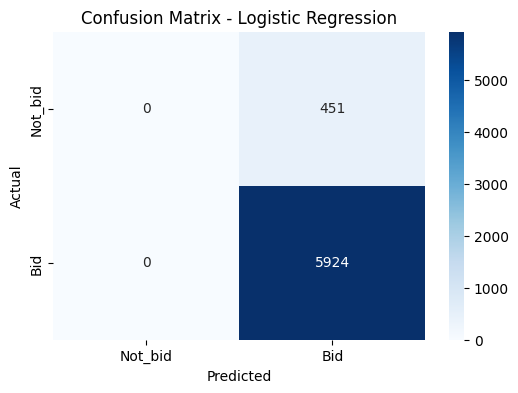

In [6]:
#Logistic regression

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter for convergence
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Decision tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       451
           1       0.98      0.98      0.98      5924

    accuracy                           0.96      6375
   macro avg       0.84      0.84      0.84      6375
weighted avg       0.96      0.96      0.96      6375


Accuracy: 0.9587450980392157

ROC AUC Score: 0.8465176417923408

Confusion Matrix:
[[ 320  131]
 [ 132 5792]]


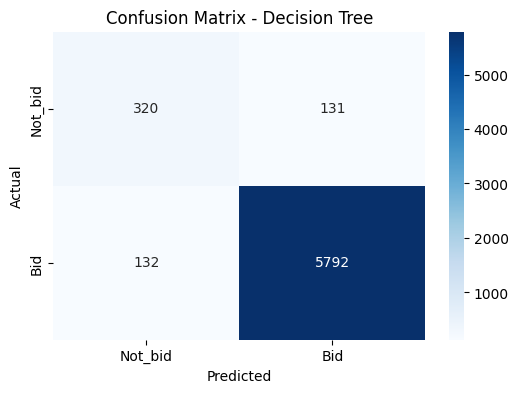

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_predictions = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nAccuracy:", dt_accuracy)

# ROC AUC Score
dt_roc_auc = roc_auc_score(y_test, dt_pred_prob)
print("\nROC AUC Score:", dt_roc_auc)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("\nConfusion Matrix:")
print(dt_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Random forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       451
           1       0.98      0.98      0.98      5924

    accuracy                           0.96      6375
   macro avg       0.87      0.85      0.86      6375
weighted avg       0.96      0.96      0.96      6375


Accuracy: 0.9634509803921568

ROC AUC Score: 0.9851120475019126

Confusion Matrix:
[[ 325  126]
 [ 107 5817]]


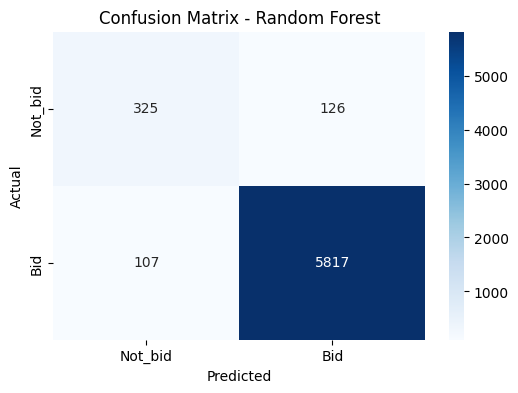

In [8]:
# Random Forest

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print("\nAccuracy:", accuracy)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, rf_pred_prob)
print("\nROC AUC Score:", roc_auc)


# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(rf_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()



### Light GBM

[LightGBM] [Info] Number of positive: 13822, number of negative: 1053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1860
[LightGBM] [Info] Number of data points in the train set: 14875, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.929210 -> initscore=2.574618
[LightGBM] [Info] Start training from score 2.574618
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       451
           1       0.98      0.98      0.98      5924

    accuracy                           0.96      6375
   macro avg       0.87      0.85      0.86      6375
weighted avg       0.96      0.96      0.96      6375


Accuracy: 0.9643921568627452

ROC AUC Score: 0.9862841371339255

Confusion Matrix:
[[

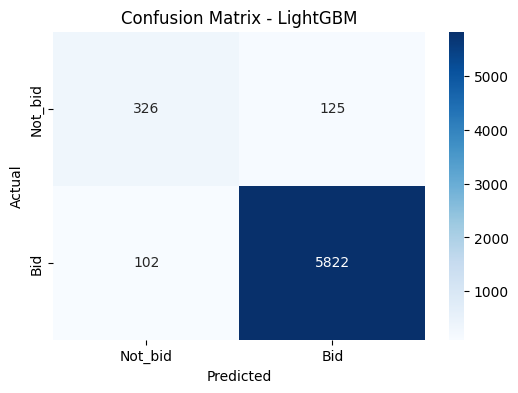

In [9]:
#LIGHTGBM

# Train a LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_predictions))

# Accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("\nAccuracy:", lgbm_accuracy)

# ROC AUC Score
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_prob)
print("\nROC AUC Score:", lgbm_roc_auc)

# Confusion Matrix
lgbm_cm = confusion_matrix(y_test, lgbm_predictions)
print("\nConfusion Matrix:")
print(lgbm_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

### XGBoost

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       451
           1       0.98      0.98      0.98      5924

    accuracy                           0.96      6375
   macro avg       0.86      0.85      0.86      6375
weighted avg       0.96      0.96      0.96      6375


Accuracy: 0.9629803921568627

ROC AUC Score: 0.9851358149269909

Confusion Matrix:
[[ 321  130]
 [ 106 5818]]


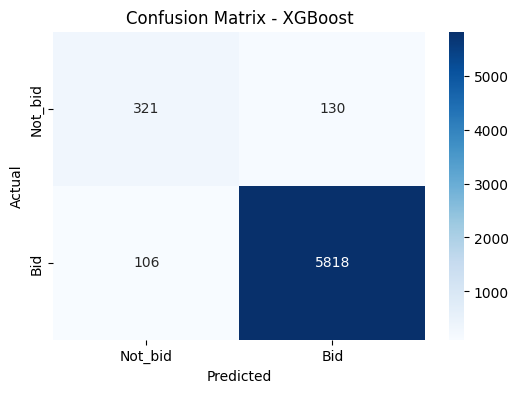

In [10]:
#XGBoost

# Train an XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nAccuracy:", xgb_accuracy)

# ROC AUC Score
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_prob)
print("\nROC AUC Score:", xgb_roc_auc)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("\nConfusion Matrix:")
print(xgb_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### SVM

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.93      1.00      0.96      5924

    accuracy                           0.93      6375
   macro avg       0.46      0.50      0.48      6375
weighted avg       0.86      0.93      0.90      6375


Accuracy: 0.9290980392156862

ROC AUC Score: 0.9509296244671979

Confusion Matrix:
[[   0  451]
 [   1 5923]]


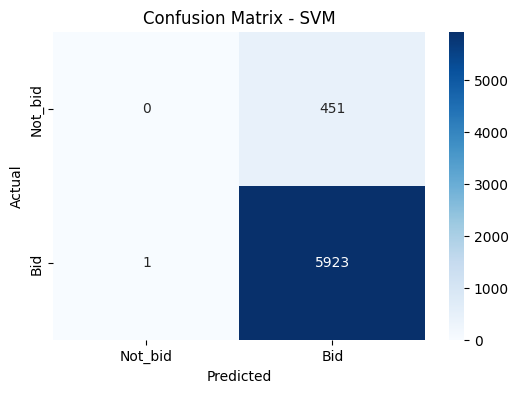

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM Classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test_scaled)
svm_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nAccuracy:", svm_accuracy)

# ROC AUC Score
svm_roc_auc = roc_auc_score(y_test, svm_pred_prob)
print("\nROC AUC Score:", svm_roc_auc)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print("\nConfusion Matrix:")
print(svm_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


### Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.93      1.00      0.96      5924

    accuracy                           0.93      6375
   macro avg       0.46      0.50      0.48      6375
weighted avg       0.86      0.93      0.90      6375


Accuracy: 0.9292549019607843

ROC AUC Score: 0.7888241824380062

Confusion Matrix:
[[   0  451]
 [   0 5924]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


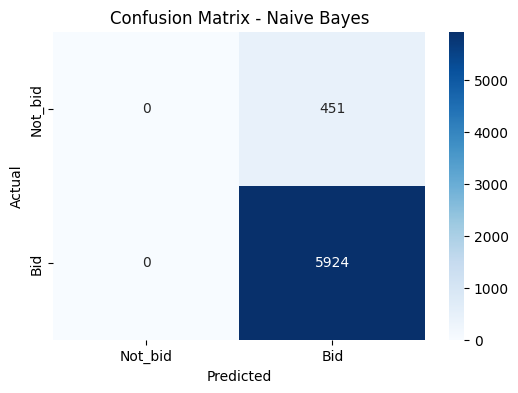

In [12]:
from sklearn.naive_bayes import GaussianNB


# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_predictions = nb_model.predict(X_test)
nb_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nAccuracy:", nb_accuracy)

# ROC AUC Score
nb_roc_auc = roc_auc_score(y_test, nb_pred_prob)
print("\nROC AUC Score:", nb_roc_auc)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
print("\nConfusion Matrix:")
print(nb_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


### KNN

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.29      0.37       451
           1       0.95      0.98      0.96      5924

    accuracy                           0.93      6375
   macro avg       0.73      0.64      0.67      6375
weighted avg       0.92      0.93      0.92      6375


Accuracy: 0.9305098039215687

ROC AUC Score: 0.7922569846286518

Confusion Matrix:
[[ 132  319]
 [ 124 5800]]


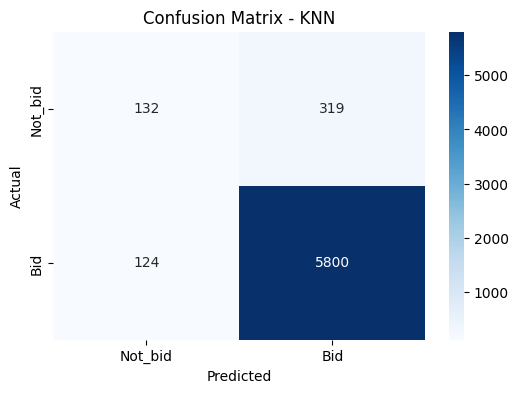

In [13]:
#KNN

from sklearn.neighbors import KNeighborsClassifier


# Initialize and train K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_predictions = knn_model.predict(X_test)
knn_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("\nAccuracy:", knn_accuracy)

# ROC AUC Score
knn_roc_auc = roc_auc_score(y_test, knn_pred_prob)
print("\nROC AUC Score:", knn_roc_auc)

# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("\nConfusion Matrix:")
print(knn_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


### LDA - Linear Discriminant Analysis

Linear Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.93      1.00      0.96      5924

    accuracy                           0.93      6375
   macro avg       0.46      0.50      0.48      6375
weighted avg       0.86      0.93      0.90      6375


Accuracy: 0.9290980392156862

ROC AUC Score: 0.8231095352663673

Confusion Matrix:
[[   0  451]
 [   1 5923]]


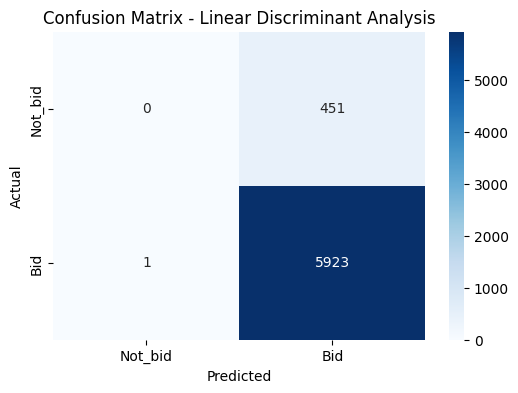

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Linear Discriminant Analysis Classifier
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predict and evaluate
lda_predictions = lda_model.predict(X_test)
lda_pred_prob = lda_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Linear Discriminant Analysis Classification Report:")
print(classification_report(y_test, lda_predictions))

# Accuracy
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("\nAccuracy:", lda_accuracy)

# ROC AUC Score
lda_roc_auc = roc_auc_score(y_test, lda_pred_prob)
print("\nROC AUC Score:", lda_roc_auc)

# Confusion Matrix
lda_cm = confusion_matrix(y_test, lda_predictions)
print("\nConfusion Matrix:")
print(lda_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(lda_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.show()


In [ ]:
# !pip install catboost

### Catboost

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       451
           1       0.98      0.98      0.98      5924

    accuracy                           0.97      6375
   macro avg       0.87      0.87      0.87      6375
weighted avg       0.97      0.97      0.97      6375


Accuracy: 0.9663
ROC AUC Score: 0.9867

Confusion Matrix:
[[ 338  113]
 [ 102 5822]]


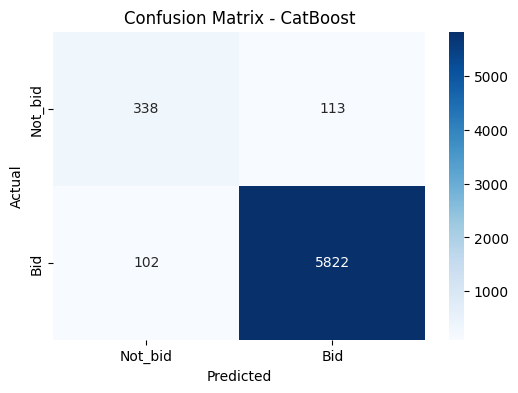

In [16]:
from catboost import CatBoostClassifier

# Initialize and train CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predict on the test set
catboost_predictions = catboost_model.predict(X_test)
catboost_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, catboost_predictions))

# Accuracy
accuracy = catboost_model.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, catboost_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
catboost_cm = confusion_matrix(y_test, catboost_predictions)
print("\nConfusion Matrix:")
print(catboost_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(catboost_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not_bid', 'Bid'], yticklabels=['Not_bid', 'Bid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()


## 3. Performance comparison

In [17]:
#Performance comparison

# Example list of models and their predictions (replace these with your actual models and predictions)
models = {
    "Random Forest": (rf_model, rf_predictions, rf_pred_prob),
    "LightGBM": (lgbm_model, lgbm_predictions, lgbm_pred_prob),
    "XGBoost": (xgb_model, xgb_predictions, xgb_pred_prob),
    "Logistic Regression": (log_reg, y_pred, y_pred_prob),
    "Decision Tree": (dt_model, dt_predictions, dt_pred_prob),
    "SVM": (svm_model, svm_predictions, svm_pred_prob),
    "Naive Bayes": (nb_model, nb_predictions, nb_pred_prob),
    "KNN": (knn_model, knn_predictions, knn_pred_prob),
    "LDA": (lda_model, lda_predictions, lda_pred_prob),
    "CatBoost": (catboost_model, catboost_predictions, catboost_pred_prob),
}

# Store metrics for each model
results = {
    "Model": [],
    "Accuracy": [],
    "ROC AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Loop through models and calculate metrics
for model_name, (model, predictions, pred_prob) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, pred_prob)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["ROC AUC"].append(roc_auc)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Print results
print("Model Performance Metrics:")
print(results_df)

# Optional: Save to CSV
# results_df.to_csv('model_performance_metrics.csv', index=False)


Model Performance Metrics:
                 Model  Accuracy   ROC AUC  Precision    Recall  F1-Score
0        Random Forest  0.963451  0.985112   0.978799  0.981938  0.980366
1             LightGBM  0.964392  0.986284   0.978981  0.982782  0.980878
2              XGBoost  0.962980  0.985136   0.978144  0.982107  0.980121
3  Logistic Regression  0.929255  0.845417   0.929255  1.000000  0.963330
4        Decision Tree  0.958745  0.846518   0.977883  0.977718  0.977800
5                  SVM  0.929098  0.950930   0.929244  0.999831  0.963246
6          Naive Bayes  0.929255  0.788824   0.929255  1.000000  0.963330
7                  KNN  0.930510  0.792257   0.947867  0.979068  0.963215
8                  LDA  0.929098  0.823110   0.929244  0.999831  0.963246
9             CatBoost  0.966275  0.986692   0.980960  0.982782  0.981870


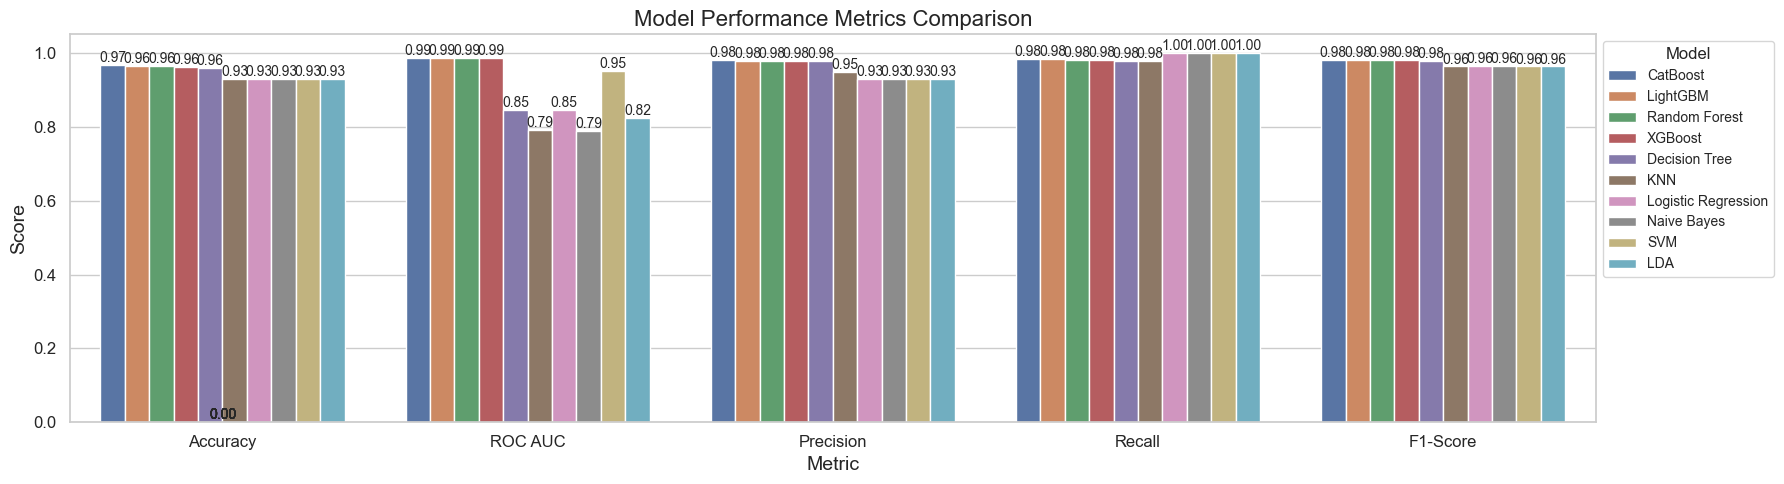

In [18]:
#Performance comparison

# Sort results_df by Accuracy in descending order
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Melt the DataFrame for visualization
results_melted = results_df_sorted.melt(id_vars=["Model"],
                                        var_name="Metric",
                                        value_name="Score")

# Set up the figure size and style
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")

# Create a barplot
ax = sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", order=["Accuracy", "ROC AUC", "Precision", "Recall", "F1-Score"])

# Add numbers above the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center', size=10, xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(title="Model", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()
